<a href="https://colab.research.google.com/github/lhiwi/Regularization-_early-stopping-model/blob/main/cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
# Load and read the data
file_path = '/content/cancer_classification.csv'
df = pd.read_csv(file_path)
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [80]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [81]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

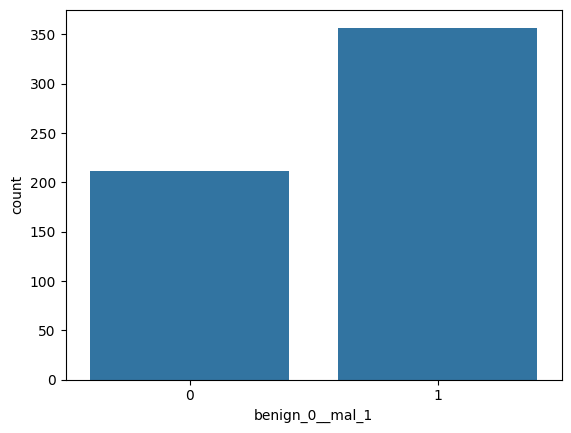

In [106]:
# Draw the plot target values
sns.countplot(x='benign_0__mal_1', data = df)

<Axes: >

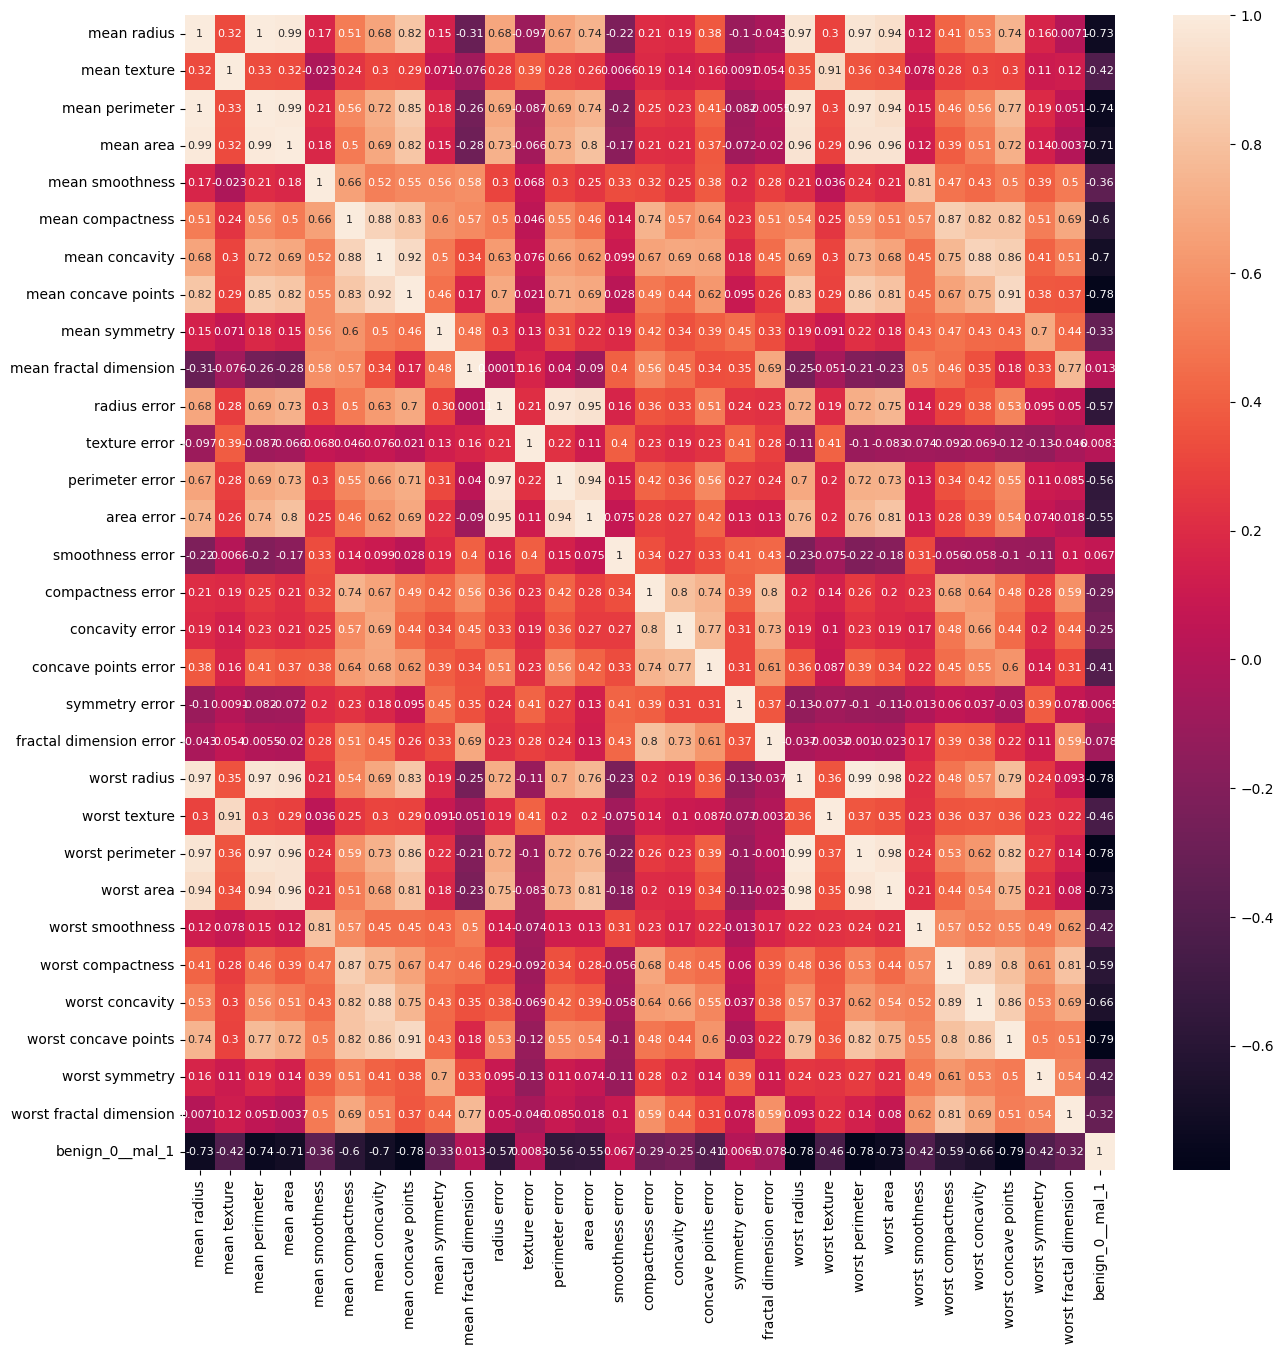

In [105]:
#Draw the correlation matrix of the dataset's features
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True, annot_kws={'size':8})

In [84]:
df.corr()['benign_0__mal_1'].sort_values()

,benign_0__mal_1
worst concave points,-0.793566
worst perimeter,-0.782914
mean concave points,-0.776614
worst radius,-0.776454
mean perimeter,-0.742636
worst area,-0.733825
mean radius,-0.730029
mean area,-0.708984
mean concavity,-0.696360
worst concavity,-0.659610


<Axes: >

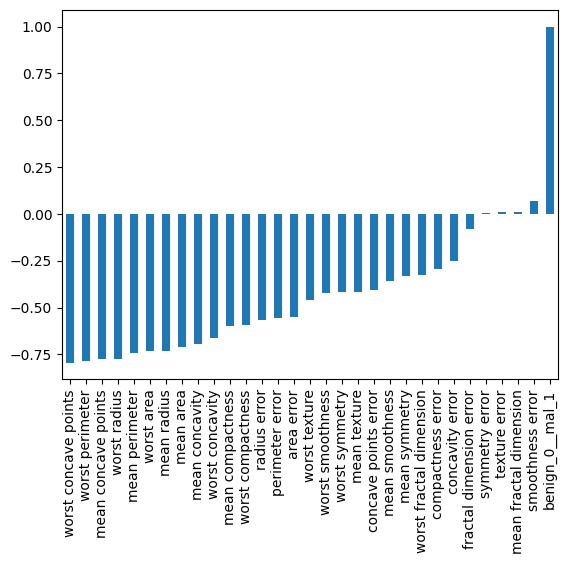

In [85]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

In [86]:
X = df.drop('benign_0__mal_1', axis = 1).values
Y = df['benign_0__mal_1'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.25, random_state=23)

print(X_train.shape, Y_train.shape)

(426, 30) (426,)


In [87]:
print(X_test.shape, Y_test.shape)

(143, 30) (143,)


In [88]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [109]:
# Define the model
model = Sequential()
model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [90]:
#Train the model with a fixed number of epochs
model.fit(x = X_train, y = Y_train, epochs = 600, validation_data = (X_test, Y_test))

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3582 - loss: 0.7010 - val_accuracy: 0.5245 - val_loss: 0.6710
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5364 - loss: 0.6625 - val_accuracy: 0.7832 - val_loss: 0.6330
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8178 - loss: 0.6246 - val_accuracy: 0.8951 - val_loss: 0.5882
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8870 - loss: 0.5809 - val_accuracy: 0.8881 - val_loss: 0.5412
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8964 - loss: 0.5291 - val_accuracy: 0.9021 - val_loss: 0.4861
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9198 - loss: 0.4776 - val_accuracy: 0.9091 - val_loss: 0.4301
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9347 - loss: 0.4102 - val_accuracy: 0.9091 - val_loss: 0.3797
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9308 - loss: 0.3694 - val_accuracy: 0.9301 - 

This shows that the model was trained for 600 number of epochs

In [91]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 15)                  │             465 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,235 (16.55 KB)

 Trainable params: 1,411 (5.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,824 (11.04 KB)

In [92]:
info = pd.DataFrame(model.history.history)
info

,accuracy,loss,val_accuracy,val_loss
0,0.399061,0.686500,0.524476,0.671028
1,0.643192,0.649776,0.783217,0.633035
2,0.859155,0.612282,0.895105,0.588185
3,0.882629,0.567187,0.888112,0.541183
4,0.915493,0.519855,0.902098,0.486149
...,...,...,...,...
595,1.000000,0.002819,0.972028,0.199149
596,1.000000,0.002635,0.972028,0.200128
597,1.000000,0.002565,0.972028,0.201263
598,1.000000,0.002738,0.979021,0.203087


In [52]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=info)

https://docs.google.com/spreadsheets/d/1LMo_IoxGnvqKrVgn8zpFdzhaTD6kZMTdy0eiiExsdYs#gid=0


<Axes: >

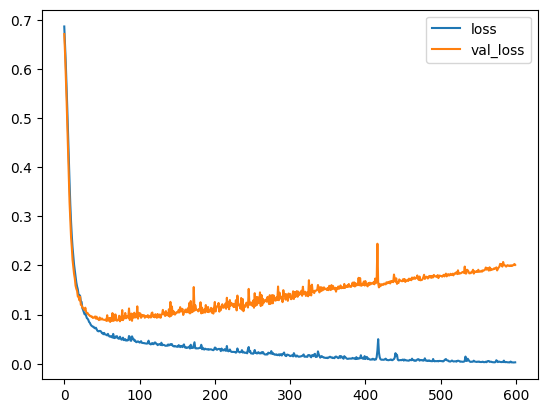

In [94]:
info[['loss', 'val_loss']].plot()

In [96]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        48
           1       0.97      1.00      0.98        95

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



# Early Stopping

In [97]:
from tensorflow.keras.callbacks import EarlyStopping
earlyStopping =  EarlyStopping(monitor = 'val_loss', mode = 'min', patience =20, restore_best_weights=True,  verbose=1)

In [104]:
model = Sequential()
model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [99]:
model.fit(x = X_train, y= Y_train, epochs = 600, validation_data=(X_test, Y_test), callbacks=[earlyStopping])

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5751 - loss: 0.6950 - val_accuracy: 0.8252 - val_loss: 0.6651
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7994 - loss: 0.6614 - val_accuracy: 0.8741 - val_loss: 0.6316
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8644 - loss: 0.6264 - val_accuracy: 0.8951 - val_loss: 0.5880
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8921 - loss: 0.5864 - val_accuracy: 0.9091 - val_loss: 0.5376
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8791 - loss: 0.5425 - val_accuracy: 0.9021 - val_loss: 0.4877
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8806 - loss: 0.4971 - val_accuracy: 0.9091 - val_loss: 0.4330
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8950 - loss: 0.4485 - val_accuracy: 0.9161 - val_loss: 0.3826
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8919 - loss: 0.3962 - val_accuracy: 0.9161 - 

After using early stopping, the training stopped after the epoch the model has started overfitting, so the early stopping regularization technique

<Axes: >

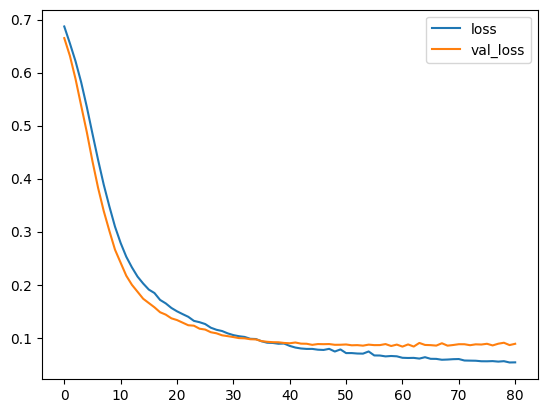

In [102]:
info = pd.DataFrame(model.history.history)
info[['loss', 'val_loss']].plot()

In [59]:
Y_test_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [72]:
Y_test_pred = (Y_test_pred > 0.5).astype('int32')

In [73]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        48
           1       0.97      1.00      0.98        95

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



In [74]:
print(confusion_matrix(Y_test, Y_test_pred))

[[45  3]
 [ 0 95]]


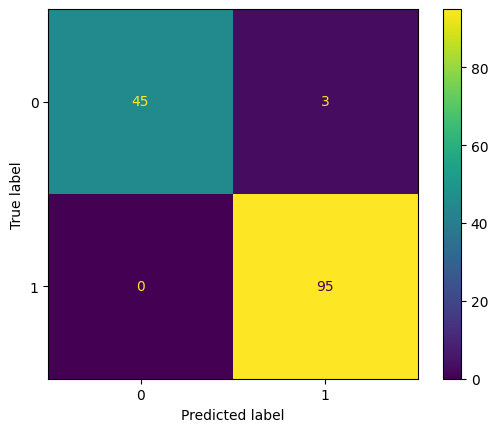

In [111]:
# plotting the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_test_pred)

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

# Plot the confusion matrix
disp.plot()
plt.show()